# **Лабораторная работа №5. Кластеризация.**

# Разбить данные на суточные наблюдения. Т.е., например, у вас был один столбец N1234 длины 168, а станет 14 столбцов N1234_summer_day1, ..., N1234_summer_day7, ..., N1234_winter_day7 длины 24. Разбить данные на летние и зимние временные ряды. Таким образом, теперь у вас есть суточные наблюдения по летним и зимним периодам. 

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("energy_consumption.xlsx", header=1)
df = df.iloc[:, :35]

In [27]:
(df.drop(['season', 'hour'], axis=1).std() < 0.01).index

Index(['N0000', 'N0001', 'N0007', 'N1002', 'N1003', 'N2004', 'N2008', 'N2009',
       'N2011', 'N2012', 'N2013', 'N2014', 'N3002', 'N4000', 'N4001', 'N4003',
       'N4004', 'N5000', 'N5001', 'N6000', 'N6001', 'N7004', 'N7005', 'N7006',
       'N7008', 'N7010', 'N7012', 'N8000', 'N8005', 'N8008', 'N8010', 'N8012',
       'N8014'],
      dtype='object')

In [32]:
df.drop(['season', 'hour'], axis=1).std().sort_values(ascending=True).index

Index(['N8014', 'N2004', 'N7006', 'N8012', 'N2011', 'N8005', 'N2008', 'N7008',
       'N2014', 'N6000', 'N8010', 'N7012', 'N0000', 'N4000', 'N7010', 'N1002',
       'N5000', 'N2009', 'N4004', 'N1003', 'N5001', 'N4001', 'N7004', 'N4003',
       'N8008', 'N7005', 'N2012', 'N8000', 'N2013', 'N0007', 'N3002', 'N0001',
       'N6001'],
      dtype='object')

In [5]:
df_summer = df[df.season == 1].drop('season', axis=1)
df_winter = df[df.season == 2].drop('season', axis=1)

In [6]:
df_summer

,hour,N0000,N0001,N0007,N1002,N1003,N2004,N2008,N2009,N2011,...,N7006,N7008,N7010,N7012,N8000,N8005,N8008,N8010,N8012,N8014
0,1,54.793634,437.206366,338,193,444,13.845182,59.019614,177.058842,39.346409,...,103.892529,147.388728,250.295432,188.427113,380.110449,70.546589,375.453411,138.303997,32.696003,18.889551
1,2,54.633574,436.366426,284,171,423,13.845182,47.999345,143.998036,31.999564,...,103.892529,139.011382,240.907289,169.817401,408.110449,61.732389,336.267611,120.510501,28.489499,18.889551
2,3,46.310471,392.689529,258,154,407,13.845182,46.525705,139.577114,31.017137,...,103.892529,139.395881,245.160111,164.431176,349.110449,54.203593,302.796407,111.613752,26.386248,18.889551
3,4,40.068143,359.931857,251,144,402,13.845182,43.386210,130.158629,28.924140,...,103.892529,136.293084,239.500098,161.102609,364.110449,53.285447,298.714553,109.187366,25.812634,18.889551
4,5,39.107785,354.892215,255,141,407,13.845182,40.951499,122.854497,27.300999,...,103.892529,140.488233,255.487350,151.994442,357.110449,50.714639,287.285361,104.334594,24.665406,18.889551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,164,61.516141,472.483859,312,175,407,13.845182,62.415395,187.246184,41.610263,...,103.892529,140.596858,234.056600,187.426167,283.110449,72.933768,386.066232,135.068816,31.931184,18.889551
164,165,56.714350,447.285650,311,176,426,13.845182,54.342407,163.027221,36.228271,...,103.892529,146.091302,250.206798,183.315675,290.110449,72.199251,382.800749,134.260021,31.739979,18.889551
165,166,53.353097,429.646903,286,177,427,13.845182,60.621397,181.864192,40.414265,...,103.892529,149.614238,257.858184,185.094843,387.110449,49.796493,283.203507,134.260021,31.739979,18.889551
166,167,71.279782,523.720218,345,178,424,13.845182,72.090165,216.270496,48.060110,...,103.892529,154.572795,263.736047,195.585800,326.110449,93.500234,477.499766,147.200746,34.799254,18.889551


In [7]:
hour_template = df_summer['hour'].iloc[:24].reset_index(drop=True)
df_daily_summer = pd.DataFrame({'hour': hour_template})
df_daily_winter = pd.DataFrame({'hour': hour_template})

In [ ]:
for col in df_summer.drop('hour', axis=1).columns:
    reshaped = df_summer[col].to_numpy().reshape(7, 24)
    for day_idx in range(7):
        new_col = f"{col}_summer_day{day_idx + 1}"
        df_daily_summer[new_col] = pd.Series(reshaped[day_idx]).reset_index(drop=True)

for col in df_winter.drop('hour', axis=1).columns:
    reshaped = df_winter[col].to_numpy().reshape(7, 24)
    for day_idx in range(7):
        new_col = f"{col}_winter_day{day_idx + 1}"
        df_daily_winter[new_col] = pd.Series(reshaped[day_idx]).reset_index(drop=True)

In [12]:
df_daily_summer.drop('hour',axis=1).T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
N0000_summer_day1,54.793634,54.633574,46.310471,40.068143,39.107785,40.708382,44.389754,40.388262,48.071127,56.074111,...,66.477991,69.679185,69.199006,69.038946,69.679185,68.878886,68.718827,65.997812,75.281274,65.837752
N0000_summer_day2,61.196021,56.074111,48.231187,45.990351,41.988859,44.069635,36.066651,44.549814,54.953694,61.356081,...,61.196021,67.918528,65.997812,68.878886,68.398707,60.715842,65.677693,69.199006,98.329869,71.279782
N0000_summer_day3,61.516141,86.005273,78.962647,79.442826,86.485452,100.250585,114.175778,51.912560,51.592440,54.953694,...,62.476499,70.799603,65.037454,66.638051,71.759961,65.677693,61.035962,67.278290,72.880379,67.598409
N0000_summer_day4,62.476499,51.912560,48.711366,52.072619,40.548322,38.307486,40.388262,42.308978,51.112261,64.077096,...,64.877394,66.157872,69.519125,65.677693,70.959662,71.599901,65.677693,68.398707,74.480975,70.479483
N0000_summer_day5,63.116738,53.513157,50.311963,46.790650,42.789158,36.386770,38.627606,49.511664,52.712858,59.435365,...,68.238648,71.759961,69.839245,69.359065,66.958170,69.839245,63.436857,65.197514,72.240140,75.441334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N8014_summer_day3,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,...,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551
N8014_summer_day4,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,...,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551
N8014_summer_day5,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,...,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551
N8014_summer_day6,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,...,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551,18.889551


# 1. Провести кластеризацию летних временных рядов с помощью следующих алгоритмов: иерархическая кластеризация, kmeans, dbscan. Для каждого алгоритма подобрать оптимальные параметры. Качество кластеризации рекомендуется измерять с помощью индекса ''силуэт'' (silhouette_score, есть в sklearn.metrics), но при желании можно использовать любую другую метрику.

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

summer_series = df_daily_summer.drop('hour', axis=1).T
summer_series.index.name = 'series'
summer_series.reset_index(inplace=True)

features = summer_series.drop('series', axis=1)

# удаляем константные (или почти константные) ряды
std_per_series = features.std(axis=1)               # std для каждой строки/ряда
threshold = 0.01                                    # настройте при необходимости
mask_keep = std_per_series >= threshold
removed_series = summer_series.loc[~mask_keep, 'series'].tolist()

# оставшиеся для кластеризации
features = features[mask_keep.values].reset_index(drop=True)   # DataFrame числовых признаков
summer_series_filtered = summer_series[mask_keep.values].reset_index(drop=True)

scaler = StandardScaler()
X = scaler.fit_transform(features)

print(f"Количество летних суточных рядов: {features.shape[0]}")


Количество летних суточных рядов: 210


In [35]:
removed_series

['N2004_summer_day1',
 'N2004_summer_day2',
 'N2004_summer_day3',
 'N2004_summer_day4',
 'N2004_summer_day5',
 'N2004_summer_day6',
 'N2004_summer_day7',
 'N7006_summer_day1',
 'N7006_summer_day2',
 'N7006_summer_day3',
 'N7006_summer_day4',
 'N7006_summer_day5',
 'N7006_summer_day6',
 'N7006_summer_day7',
 'N8014_summer_day1',
 'N8014_summer_day2',
 'N8014_summer_day3',
 'N8014_summer_day4',
 'N8014_summer_day5',
 'N8014_summer_day6',
 'N8014_summer_day7']

In [36]:
features

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,54.793634,54.633574,46.310471,40.068143,39.107785,40.708382,44.389754,40.388262,48.071127,56.074111,...,66.477991,69.679185,69.199006,69.038946,69.679185,68.878886,68.718827,65.997812,75.281274,65.837752
1,61.196021,56.074111,48.231187,45.990351,41.988859,44.069635,36.066651,44.549814,54.953694,61.356081,...,61.196021,67.918528,65.997812,68.878886,68.398707,60.715842,65.677693,69.199006,98.329869,71.279782
2,61.516141,86.005273,78.962647,79.442826,86.485452,100.250585,114.175778,51.912560,51.592440,54.953694,...,62.476499,70.799603,65.037454,66.638051,71.759961,65.677693,61.035962,67.278290,72.880379,67.598409
3,62.476499,51.912560,48.711366,52.072619,40.548322,38.307486,40.388262,42.308978,51.112261,64.077096,...,64.877394,66.157872,69.519125,65.677693,70.959662,71.599901,65.677693,68.398707,74.480975,70.479483
4,63.116738,53.513157,50.311963,46.790650,42.789158,36.386770,38.627606,49.511664,52.712858,59.435365,...,68.238648,71.759961,69.839245,69.359065,66.958170,69.839245,63.436857,65.197514,72.240140,75.441334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,30.401546,26.003838,24.665406,23.900587,23.326973,22.753359,21.988540,22.562154,24.665406,27.342271,...,28.107090,28.298295,28.489499,28.298295,27.533476,28.298295,27.342271,27.724681,32.122389,32.887207
206,29.445523,25.430224,23.326973,22.562154,22.370949,21.988540,21.223721,22.179744,24.282996,27.342271,...,30.019137,29.827932,30.592751,30.019137,29.636728,29.445523,29.445523,28.871909,33.078412,34.225640
207,30.019137,26.003838,24.091791,23.135768,22.370949,21.988540,21.223721,22.562154,25.239020,27.915885,...,30.783956,31.357570,32.122389,31.548774,30.210342,28.871909,28.107090,27.915885,31.357570,32.122389
208,29.445523,25.239020,23.135768,22.179744,21.797335,21.223721,22.753359,23.326973,25.812634,28.298295,...,30.975160,30.975160,31.166365,31.739979,31.931184,31.166365,30.975160,31.739979,34.990459,35.946482


In [39]:
def evaluate_kmeans(X, cluster_range):
    results = []
    for k in cluster_range:
        model = KMeans(n_clusters=k, n_init='auto', random_state=42)
        labels = model.fit_predict(X)
        score = silhouette_score(X, labels)
        results.append({'k': k, 'silhouette': score, 'model': model, 'labels': labels})
    return results

kmeans_results = evaluate_kmeans(X, range(2, 9))
kmeans_df = pd.DataFrame([
    {'k': r['k'], 'silhouette': r['silhouette']}
    for r in kmeans_results
]).sort_values('silhouette', ascending=False)

best_kmeans = max(kmeans_results, key=lambda r: r['silhouette'])
best_kmeans['silhouette']


c:\Users\smolk\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\smolk\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\smolk\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\smolk\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

0.8198805083385242

In [40]:
kmeans_df


,k,silhouette
0,2,0.819881
2,4,0.576150
1,3,0.547345
4,6,0.539703
6,8,0.538476
3,5,0.528344
5,7,0.524216


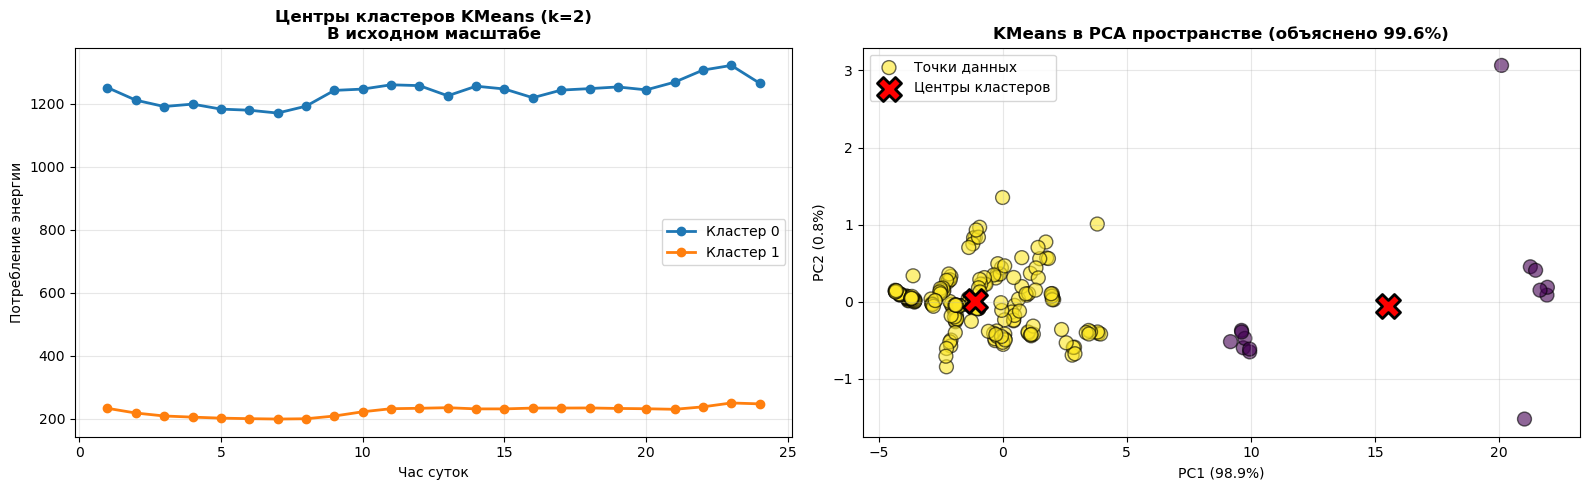


KMeans с k=2 (silhouette=0.820)

Кластер 0: 14 рядов


ValueError: Item wrong length 210 instead of 231.

In [41]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Получаем лучшую модель KMeans (с k=2)
best_model = best_kmeans['model']
best_labels = best_kmeans['labels']

# Визуализация 1: Центры кластеров в исходном пространстве (часы)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Обратное преобразование центров из нормализованного пространства
cluster_centers_original = scaler.inverse_transform(best_model.cluster_centers_)

hours = df_daily_summer['hour'].values

for cluster_id in range(best_model.n_clusters):
    axes[0].plot(hours, cluster_centers_original[cluster_id], 
                 marker='o', linewidth=2, label=f'Кластер {cluster_id}', markersize=6)

axes[0].set_title(f'Центры кластеров KMeans (k={best_kmeans["k"]})\nВ исходном масштабе', 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Час суток')
axes[0].set_ylabel('Потребление энергии')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Визуализация 2: PCA с отмеченными центрами кластеров
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centers_pca = pca.transform(best_model.cluster_centers_)

scatter = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, 
                         cmap='viridis', s=100, alpha=0.6, edgecolors='k', label='Точки данных')
axes[1].scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=300, 
               marker='X', edgecolors='black', linewidths=2, label='Центры кластеров', zorder=5)

axes[1].set_title(f'KMeans в PCA пространстве (объяснено {pca.explained_variance_ratio_.sum():.1%})', 
                 fontsize=12, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Дополнительная информация о кластерах
print(f"\n{'='*50}")
print(f"KMeans с k={best_kmeans['k']} (silhouette={best_kmeans['silhouette']:.3f})")
print(f"{'='*50}")
for cluster_id in range(best_model.n_clusters):
    cluster_mask = best_labels == cluster_id
    n_points = cluster_mask.sum()
    print(f"\nКластер {cluster_id}: {n_points} рядов")
    print(f"Точки: {summer_series[cluster_mask]['series'].tolist()}")

In [13]:
def evaluate_agglomerative(X, cluster_range, linkage='ward'):
    results = []
    for k in cluster_range:
        model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels = model.fit_predict(X)
        score = silhouette_score(X, labels)
        results.append({'k': k, 'silhouette': score, 'linkage': linkage, 'labels': labels})
    return results

agglo_results = evaluate_agglomerative(X, range(2, 9))
agglo_df = pd.DataFrame([
    {'k': r['k'], 'silhouette': r['silhouette']}
    for r in agglo_results
]).sort_values('silhouette', ascending=False)

best_agglo = max(agglo_results, key=lambda r: r['silhouette'])
best_agglo['silhouette']


0.8198585022052368

In [14]:
agglo_df


,k,silhouette
0,2,0.819859
2,4,0.572633
1,3,0.549636
4,6,0.539160
5,7,0.535580
6,8,0.518868
3,5,0.507507


In [15]:
def evaluate_dbscan(X, eps_values, min_samples_values):
    results = []
    for eps in eps_values:
        for min_samples in min_samples_values:
            model = DBSCAN(eps=eps, min_samples=min_samples)
            labels = model.fit_predict(X)
            unique_labels = set(labels)
            cluster_labels = [label for label in unique_labels if label != -1]
            if len(cluster_labels) < 2:
                continue  # силуэт не определён, если меньше двух кластеров
            score = silhouette_score(X, labels, metric='euclidean')
            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'silhouette': score,
                'labels': labels
            })
    return results

dbscan_results = evaluate_dbscan(X, eps_values=np.arange(0.5, 3.1, 0.25), min_samples_values=range(3, 8))

dbscan_df = pd.DataFrame([
    {'eps': r['eps'], 'min_samples': r['min_samples'], 'silhouette': r['silhouette']}
    for r in dbscan_results
]).sort_values('silhouette', ascending=False)

best_dbscan = max(dbscan_results, key=lambda r: r['silhouette']) if dbscan_results else None

best_dbscan['silhouette'] if best_dbscan else 'Комбинаций с >=2 кластерами не найдено'


0.748629066977248

In [16]:
dbscan_df.head(10) if not dbscan_df.empty else 'Нет валидных комбинаций'


,eps,min_samples,silhouette
54,3.00,7,0.748629
33,2.00,6,0.748629
34,2.00,7,0.748629
49,2.75,7,0.748629
39,2.25,7,0.748629
44,2.50,7,0.748629
42,2.50,5,0.741437
35,2.25,3,0.741437
36,2.25,4,0.741437
37,2.25,5,0.741437


In [17]:
summary_rows = [
    {
        'algorithm': 'KMeans',
        'params': {'k': best_kmeans['k']},
        'silhouette': round(best_kmeans['silhouette'], 3)
    },
    {
        'algorithm': 'Agglomerative',
        'params': {'k': best_agglo['k'], 'linkage': best_agglo['linkage']},
        'silhouette': round(best_agglo['silhouette'], 3)
    }
]

if best_dbscan:
    summary_rows.append({
        'algorithm': 'DBSCAN',
        'params': {'eps': best_dbscan['eps'], 'min_samples': best_dbscan['min_samples']},
        'silhouette': round(best_dbscan['silhouette'], 3)
    })
else:
    summary_rows.append({'algorithm': 'DBSCAN', 'params': '-', 'silhouette': 'н/д'})

pd.DataFrame(summary_rows)


,algorithm,params,silhouette
0,KMeans,{'k': 2},0.820
1,Agglomerative,"{'k': 2, 'linkage': 'ward'}",0.820
2,DBSCAN,"{'eps': 2.0, 'min_samples': 6}",0.749


In [18]:
cluster_assignment = pd.DataFrame({
    'series': summer_series['series'],
    'kmeans_cluster': best_kmeans['labels'],
    'agglo_cluster': best_agglo['labels'],
    'dbscan_cluster': best_dbscan['labels'] if best_dbscan else ['н/д'] * len(summer_series)
})

cluster_assignment

,series,kmeans_cluster,agglo_cluster,dbscan_cluster
0,N0000_summer_day1,1,0,0
1,N0000_summer_day2,1,0,0
2,N0000_summer_day3,1,0,0
3,N0000_summer_day4,1,0,0
4,N0000_summer_day5,1,0,0
...,...,...,...,...
226,N8014_summer_day3,1,0,0
227,N8014_summer_day4,1,0,0
228,N8014_summer_day5,1,0,0
229,N8014_summer_day6,1,0,0


Объяснённая дисперсия первыми двумя компонентами: 99.64%


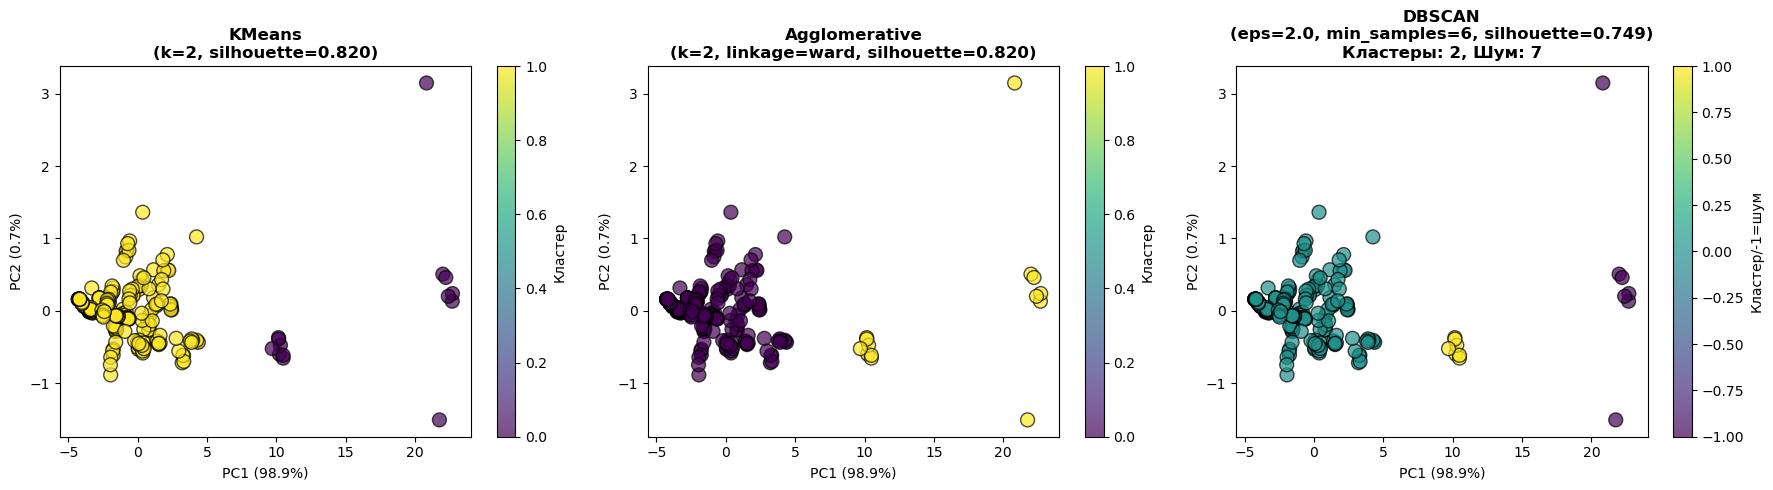

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Применяем PCA для визуализации в 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(f"Объяснённая дисперсия первыми двумя компонентами: {pca.explained_variance_ratio_.sum():.2%}")

# Создаём фигуру с тремя подграфиками
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# KMeans
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=best_kmeans['labels'], 
                           cmap='viridis', s=100, alpha=0.7, edgecolors='k')
axes[0].set_title(f"KMeans\n(k={best_kmeans['k']}, silhouette={best_kmeans['silhouette']:.3f})", 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%})")
axes[0].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%})")
plt.colorbar(scatter1, ax=axes[0], label='Кластер')

# Agglomerative
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=best_agglo['labels'], 
                           cmap='viridis', s=100, alpha=0.7, edgecolors='k')
axes[1].set_title(f"Agglomerative\n(k={best_agglo['k']}, linkage={best_agglo['linkage']}, silhouette={best_agglo['silhouette']:.3f})", 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%})")
axes[1].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%})")
plt.colorbar(scatter2, ax=axes[1], label='Кластер')

# DBSCAN
if best_dbscan:
    dbscan_labels = best_dbscan['labels']
    scatter3 = axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, 
                               cmap='viridis', s=100, alpha=0.7, edgecolors='k')
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)
    axes[2].set_title(f"DBSCAN\n(eps={best_dbscan['eps']}, min_samples={best_dbscan['min_samples']}, silhouette={best_dbscan['silhouette']:.3f})\nКластеры: {n_clusters}, Шум: {n_noise}", 
                      fontsize=12, fontweight='bold')
    axes[2].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%})")
    axes[2].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%})")
    plt.colorbar(scatter3, ax=axes[2], label='Кластер/-1=шум')

plt.tight_layout()
plt.show()